# Анализ данных с помощью библиотеки Pandas

## 1. План занятия

Спикер: Андрей Рысистов

Контакты(телеграм): @Rysistov


План занятия
1. Обсудим что такое Pandas и зачем он нам нужен
2. Поговорим о структурах данных в Pandas(Series, DataFrame)
3. Разберем основные функции на игрушечный данных
4. Практика на реальных данных. Алгоритм работы в данными

## 2. Библиотека Pandas

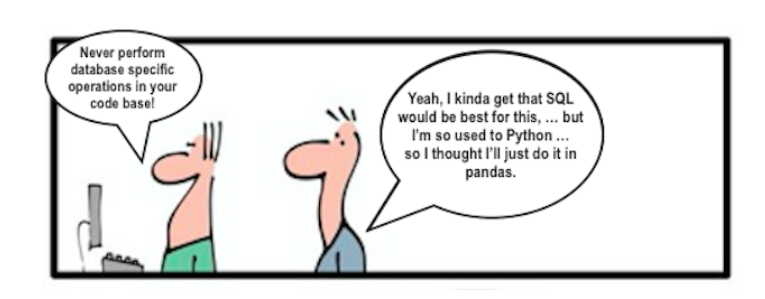

**Pandas** - это высокоуровневая Python библиотека для анализа данных, построена она поверх более низкоуровневой библиотеки NumPy (написана на Си), что является большим плюсом в производительности. В экосистеме Python, pandas является наиболее продвинутой и быстроразвивающейся библиотекой для обработки и анализа данных. 

In [ ]:
import pandas as pd #импорт pandas
import numpy as np #импорт библиотеки для мат. вычислений

Основными структурами данных в Pandas являются классы **Series** и **DataFrame**.

## 3. Pandas Series

### 3.1 Что такое Series?

Структура/объект Series представляет из себя объект, похожий на одномерный массив (питоновский список, например), но отличительной его чертой является наличие ассоциированных меток, т.н. индексов, вдоль каждого элемента из списка. Такая особенность превращает его в ассоциативный массив или словарь в Python.

### 3.2 Создание Series

**Создание "по дефолту" без ассоциативных меток**

In [ ]:
my_series = pd.Series([5, 6, 7, 8, 9, 10])
my_series

0     5
1     6
2     7
3     8
4     9
5    10
dtype: int64

**Задание ассоциативных меток:**

In [ ]:
my_series2 = pd.Series(
    data=[5, 6, 7, 8, 9, 10],
    index=['a', 'b', 'c', 'd', 'e', 'f'],
    name='simple_series',
    dtype='float64'
)#создание из двух списков
my_series2

a     5.0
b     6.0
c     7.0
d     8.0
e     9.0
f    10.0
Name: simple_series, dtype: float64

### 3.3 Получение данных из Series

In [ ]:
my_series2['b']

6.0

In [ ]:
list(my_series2.values)

[5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

In [ ]:
list(my_series2.index)

['a', 'b', 'c', 'd', 'e', 'f']

### 3.4 Фильтрация данных в Series

In [ ]:
(my_series2 > 6)#получение маски

a    False
b    False
c     True
d     True
e     True
f     True
Name: simple_series, dtype: bool

In [ ]:
my_series2[(my_series2 > 6)]#фильтрация данных в серии

c     7.0
d     8.0
e     9.0
f    10.0
Name: simple_series, dtype: float64

## 4. Pandas DataFrame

### 4.1. Что такое DataFrame?

Объект DataFrame лучше всего представлять себе в виде обычной таблицы и это правильно, ведь DataFrame является табличной структурой данных. В любой таблице всегда присутствуют строки и столбцы. Столбцами в объекте DataFrame выступают объекты Series, строки которых являются их непосредственными элементами.

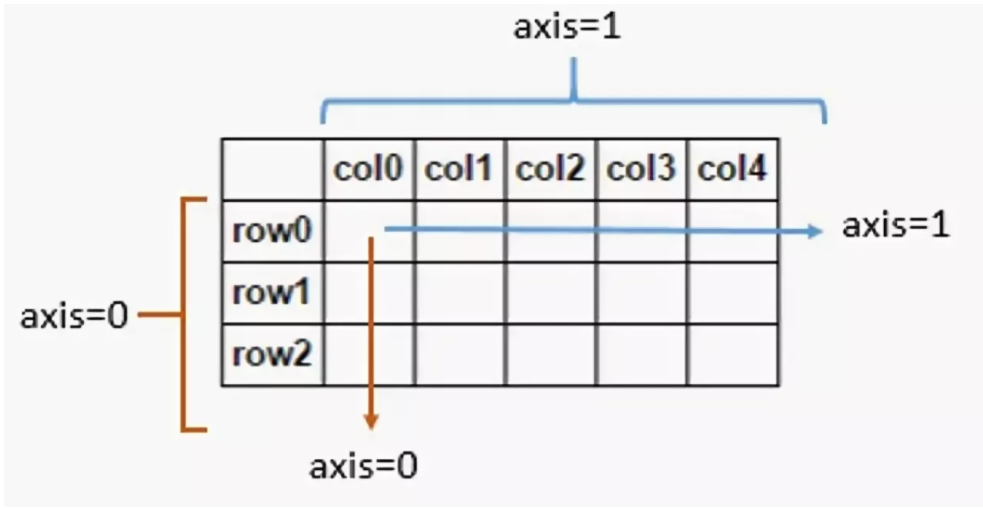

### 4.2. Создание DataFrame

In [ ]:
df = pd.DataFrame({
    'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
    'population': [17.04, 143.5, 9.5, 45.5],
    'square': [2724902, 17125191, 207600, 603628]
})#создание датафрейма из словаря
df

,country,population,square
0,Kazakhstan,17.04,2724902
1,Russia,143.50,17125191
2,Belarus,9.50,207600
3,Ukraine,45.50,603628


In [ ]:
df.index = ['KZ', 'RU', 'BY', 'UA']#зададим ассоциативные метки(индексы)
df

,country,population,square
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


### 4.3. Доступ к данным в DataFrame

Обратимся к столбцу: обращение может происходить через [] или же через ".", если имя столбца является одним словом

In [ ]:
df['population']

KZ     17.04
RU    143.50
BY      9.50
UA     45.50
Name: population, dtype: float64

In [ ]:
type(df.population)

pandas.core.series.Series

In [ ]:
df.loc[['KZ','RU'], 'square']

KZ     2724902
RU    17125191
Name: square, dtype: int64

In [ ]:
df.iloc[0:2, 2]

KZ     2724902
RU    17125191
Name: square, dtype: int64

При использовании методов .loc и .iloc необходимо помнить, что первая часть относится к строкам, вторая - к столбцам.

In [ ]:
df.loc[['BY', 'RU'],['population', 'square']]

,population,square
BY,9.5,207600
RU,143.5,17125191


In [ ]:
df.iloc[1:3, 1:3]

,population,square
RU,143.5,17125191
BY,9.5,207600


In [ ]:
#@title Напишите программу, которая выберет из таблицы стан площадь и население Казахстана и России
df.loc[['KZ', 'RU'], ['square', 'population']]

,square,population
KZ,2724902,17.04
RU,17125191,143.50


### 4.4. Фильтрация данных в DataFrame

Для реализации фильтрации DataFrame необходимо изначально задать маску фильтрации

In [ ]:
df[df.population > 10]#фильтрация по условию население >10

,country,population,square
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
UA,Ukraine,45.50,603628


Рассмотрим более сложное составное условие

In [ ]:
#более сложное условие
df[(df.square > 700000) & (df.population >10)]#.loc[:, ['population','square']]

,country,population,square
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191


### 4.5. Создание новых столбцов в DataFrame

In [ ]:
# Создаем новую колонку 
df['density'] = df['population'] / df['square'] * 1000000
df

,country,population,square,density
KZ,Kazakhstan,17.04,2724902,6.253436
RU,Russia,143.50,17125191,8.379469
BY,Belarus,9.50,207600,45.761079
UA,Ukraine,45.50,603628,75.377550


### 4.6. Удаление данных в DataFrame

In [ ]:
# Обратить внимание, что при дропе колонок необходимо в том или ином виде перезаписывать данные в исходном датафрейме
df = df.drop(['density'], axis=1)

In [ ]:
df

,country,population,square
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


### 4.7. Экспорт данных

In [ ]:
df.to_csv('country_stats.csv', index=False)

In [ ]:
!ls

country_stats.csv  drive  sample_data


In [ ]:
# df.to_csv(filename) 
# df.to_excel(filename) 
# df.to_sql(table_name, connection_object)
# df.to_json(filename)
# df.to_html(filename)
# df.to_clipboard()

### 4.8. Импорт данных

In [ ]:
pd.read_csv('country_stats.csv')

,country,population,square
0,Kazakhstan,17.04,2724902
1,Russia,143.50,17125191
2,Belarus,9.50,207600
3,Ukraine,45.50,603628


In [ ]:
# pd.read_excel('filename')
# pd.read_sql(query,connection_object) 
# pd.read_table(filename)
# pd.read_json(json_string)
# pd.read_html(url) 
# pd.read_clipboard()
# pd.DataFrame(dict)

## 5. Работа реальными с данными с помощью Pandas

Источник данных - https://www.kaggle.com/nasa/meteorite-landings.

### 5.1. Смотрим на исходные данных

**1).Загрузим исходные данные.**

In [ ]:
#@title Текст заголовка по умолчанию
df = pd.read_csv('https://raw.githubusercontent.com/AndreyRysistov/VebinarDST/main/meteorite-landings.csv', sep = ',')
# df.to_csv('files/lesson_2/meteorite-landings-output.csv', index = False)

**2).Посмотрим на первые(последние) строки файла.**

In [ ]:
df.head(10)#tail()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919.0,32.10000,71.80000,"(32.100000, 71.800000)"
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910.0,Fell,1949.0,44.83333,95.16667,"(44.833330, 95.166670)"
7,Agen,392,Valid,H5,30000.0,Fell,1814.0,44.21667,0.61667,"(44.216670, 0.616670)"
8,Aguada,398,Valid,L6,1620.0,Fell,1930.0,-31.60000,-65.23333,"(-31.600000, -65.233330)"
9,Aguila Blanca,417,Valid,L,1440.0,Fell,1920.0,-30.86667,-64.55000,"(-30.866670, -64.550000)"


**3).Посмотрим на размер данных, названия признаков и их типы.**

In [ ]:
df.shape

(45716, 10)

In [ ]:
print('Количество строк: {}'.format(df.shape[0]))
print('Количество столбцов: {}'.format(df.shape[1]))
print('Список столбцов: ', list(df.columns))

Количество строк: 45716
Количество столбцов: 10
Список столбцов:  ['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat', 'reclong', 'GeoLocation']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


**4).Посмотрим общую информацию по датафрейму.**

Для просмотра числовых статистик можно воспользоваться методом *describe*: 

In [ ]:
df.describe()#описание по числовым столбцам

,id,mass,year,reclat,reclong
count,45716.000000,4.558500e+04,45428.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.772189,-39.122580,61.074319
std,16860.683030,5.749889e+05,27.181247,46.378511,80.647298
min,1.000000,0.000000e+00,301.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2501.000000,81.166670,354.473330


### 5.2. Анализ данных

#### 5.2.1 Анализ числовых признаков

Сначала разберемся с **числовыми** характеристиками

Сортируем наши данные по году падения метеорита

In [ ]:
df = df.sort_values(by='year')
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
16356,Havana,11857,Valid,"Iron, IAB complex",NaN,Found,301.0,40.33333,-90.05000,"(40.333330, -90.050000)"
38301,Wietrzno-Bobrka,24259,Valid,Iron,376.0,Found,601.0,49.41667,21.70000,"(49.416670, 21.700000)"
703,Nogata,16988,Valid,L6,472.0,Fell,860.0,33.72500,130.75000,"(33.725000, 130.750000)"
678,Narni,16914,Valid,Stone-uncl,NaN,Fell,920.0,42.51667,12.51667,"(42.516670, 12.516670)"
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399.0,50.18333,12.73333,"(50.183330, 12.733330)"


Посмотрим на максимальный и минимальный год падения метеоритов, для этого воспользуемся агрегратной функцией max

In [ ]:
df['year'].min()

301.0

In [ ]:
df['year'].max()

2501.0

На дворе 2021 год, данные были собраны в 2016, что это за аномалия такая? Прыжок в будущее? Нет, это выброс. Посмотрим повнимательнее

In [ ]:
df[(df['year']>2016) | (df['year']<860)]#фильтрация данных

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
16356,Havana,11857,Valid,"Iron, IAB complex",NaN,Found,301.0,40.33333,-90.05000,"(40.333330, -90.050000)"
38301,Wietrzno-Bobrka,24259,Valid,Iron,376.0,Found,601.0,49.41667,21.70000,"(49.416670, 21.700000)"
30679,Northwest Africa 7701,57150,Valid,CK6,55.0,Found,2101.0,0.00000,0.00000,"(0.000000, 0.000000)"
38188,Ur,24125,Valid,Iron,NaN,Found,2501.0,30.90000,46.01667,"(30.900000, 46.016670)"


В описании данных, предоставленных NASA сказано, что стоит доверять только статистике с 860 до 2016 год. Поэтому смело избавляемся от этих четырех пришельцев

In [ ]:
drop_year = df[(df['year']>2016) | (df['year']<860)].index
print(drop_year)
df.drop(drop_year, axis=0, inplace=True)

Int64Index([16356, 38301, 30679, 38188], dtype='int64')


In [ ]:
df[(df['year']>2016) | (df['year']<860)]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation


С годом разобрались, поехали очищать наши данные дальше. Посмотрим на массу метеоритов. Расчитаем среднюю, минимальную, максимальную массу и ее стандартное отклонение

In [ ]:
print('Средняя масса метеорита: {}'.format(df['mass'].mean()))
print('Минимальная масса метеорита: {}'.format(df['mass'].min()))
print('Максимальная масса метеорита: {}'.format(df['mass'].max()))
print('СКО массы метеорита: {}'.format(df['mass'].std()))

Средняя масса метеорита: 13278.651682381636
Минимальная масса метеорита: 0.0
Максимальная масса метеорита: 60000000.0
СКО массы метеорита: 575001.4841451709


Снова какие-то аномалии с массой метеорита. Посмотрим, насколько правдоподобна нулевая масса метеорита

In [ ]:
df[df['mass'] == 0]#.shape[0]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
12627,Gove,52859,Relict,Relict iron,0.0,Found,1979.0,-12.26333,136.83833,"(-12.263330, 136.838330)"
31065,Österplana 053,56152,Relict,Relict OC,0.0,Found,2002.0,58.58333,13.43333,"(58.583330, 13.433330)"
31062,Österplana 050,56149,Relict,Relict OC,0.0,Found,2003.0,58.58333,13.43333,"(58.583330, 13.433330)"
31060,Österplana 048,56147,Relict,Relict OC,0.0,Found,2004.0,58.58333,13.43333,"(58.583330, 13.433330)"
31066,Österplana 054,56153,Relict,Relict OC,0.0,Found,2005.0,58.58333,13.43333,"(58.583330, 13.433330)"
31064,Österplana 052,56151,Relict,Relict OC,0.0,Found,2006.0,58.58333,13.43333,"(58.583330, 13.433330)"
31063,Österplana 051,56150,Relict,Relict OC,0.0,Found,2006.0,58.58333,13.43333,"(58.583330, 13.433330)"
31067,Österplana 055,56154,Relict,Relict OC,0.0,Found,2008.0,58.58333,13.43333,"(58.583330, 13.433330)"
31068,Österplana 056,56155,Relict,Relict OC,0.0,Found,2008.0,58.58333,13.43333,"(58.583330, 13.433330)"
31073,Österplana 061,56160,Relict,Relict OC,0.0,Found,2009.0,58.58333,13.43333,"(58.583330, 13.433330)"


In [ ]:
#@title Напишите код, который бы рассчитал долю метеоритов с нулевой массой среди всех метеоритов
df[df['mass'] == 0].shape[0]/df.shape[0]

0.0004156457822891145

Процент метеоритов с нулевой массой очень мал. Однако лучшим решением будет не выкидывать такие метеориты из данных, а сохранить их в отдельный датафрейм, а потом уже выкинуть их из исходного, чтобы рассматривать датасеты отдельно

In [ ]:
zero_mass_df = df[df['mass']==0]
df.drop(df[df['mass']==0].index, axis=0, inplace=True)

#### 5.2.2. Анализ категориальных признаков

Рассмотрим на количество типов метеоритов и их доли:

In [ ]:
df['nametype'].value_counts(normalize=True)#получение количества каждой категории

Valid     0.998753
Relict    0.001247
Name: nametype, dtype: float64

Выведем список уникальных категорий в столбце fall

In [ ]:
df['fall'].unique()

array(['Fell', 'Found'], dtype=object)

Посмотрим на признак класса метеорита. Класс метеорита формируется из его химических, физических и других характеристик. Подробнее в статье: https://en.wikipedia.org/wiki/Meteorite_classification

In [ ]:
df['recclass'].unique()#получение уникальных категорий

array(['L6', 'Stone-uncl', 'Iron, IID', 'LL6', 'Iron, IAB-MG',
       'Iron, IIIAB', 'Iron', 'L', 'H6', 'H', 'OC', 'Iron, IIAB', 'L5',
       'Iron, IVA-an', 'Pallasite, PMG-an', 'H5', 'H3-5', 'L/LL4',
       'Unknown', 'H4', 'Iron, IAB-sLL', 'Iron, IAB?', 'Iron, IC',
       'Iron, ungrouped', 'Iron, IVB', 'LL5', 'LL4', 'Howardite',
       'Iron, IAB complex', 'H5-7', 'CI1', 'Eucrite-mmict',
       'Pallasite, PMG', 'Martian (chassignite)', 'H?', 'L4',
       'Iron, IIIE', 'Eucrite-pmict', 'CR2', 'Iron, IVA', 'Pallasite',
       'Iron, IAB-ung', 'Aubrite', 'H4/5', 'CM2', 'LL7',
       'Mesosiderite-A1', 'Diogenite', 'Iron, IIE-an', 'Pallasite?',
       'Iron, IIC', 'H3/4', 'L3.7', 'Iron, IAB-sLH', 'Iron, IIIAB?',
       'H/L3.9', 'Iron, IIIF', 'Mesosiderite-A4', 'Mesosiderite-B4',
       'CV3', 'LL3.6', 'Iron, IIG', 'Iron, IAB-sHL', 'EL6',
       'Martian (shergottite)', 'L/LL5', 'Lodranite', 'Ureilite', 'CO3.4',
       'Angrite', 'L/LL6', 'CO3.5', 'Eucrite-cm', 'Iron, IIE', 'CO3.7',
 

Самое частовстречающееся значение называется **модальным значением** или **модой**.

In [ ]:
df['recclass'].mode()[0]#получение модального значения

'L6'

Напишите код, который бы вывел список всех уникальных имен метеоритов(name), а потом из этих имен отобрал бы все, которые начинаются с буквы G

#### 5.2.3 Методы группировки данных

Метод **groupby**


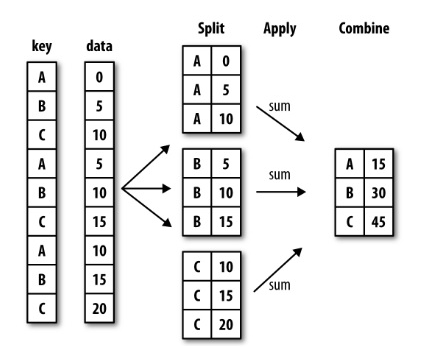

- Разделение данных по группап по определенному критерию

- Применение к каждой группе определенной функции

- Сложение результатов в единую структуру

Рассмотрим какую среднюю массу имеют найденные и упавшие метеориты в разделе признака fall

In [ ]:
#Получение информации по конкретной категории с помощью группировки
df.groupby(by='fall').mean()

,id,mass,year,reclat,reclong
fall,,,,,
Fell,16447.357724,45710.988771,1911.235772,30.043853,20.134376
Found,27136.389607,12440.742193,1993.893397,-41.211572,62.307466


А теперь попробуем понять, что особенного в массе реликтовых метеоритов

In [ ]:
#Применение различных агрегирующих функций
df.groupby(by = 'nametype').agg([np.mean, np.std, np.min, np.max])['mass']

,mean,std,amin,amax
nametype,,,,
Relict,28.152947,11.317794,0.01,3.268500e+01
Valid,13263.287564,574667.663506,0.01,6.000000e+07


In [ ]:
df.groupby(by=['nametype', 'fall'])['mass'].median()

nametype  fall 
Relict    Found       0.10
Valid     Fell     2800.00
          Found      30.59
Name: mass, dtype: float64

### 5.3. Задачи для самостоятельного разбора

Найдите метеориты, масса которых больше их медианного значения

In [ ]:
df[df.mass > df.mass.median()].name

703                Nogata
278               Elbogen
852      Rivolta de Bassi
283             Ensisheim
5329      Campo del Cielo
               ...       
38128            Um-Hadid
38201            Valencia
38224        Villa Regina
38328           Wiltshire
45700            Zaragoza
Name: name, Length: 22782, dtype: object

Найдите среднюю массу метеоритов класса Stone-uncl

Найдите, метеорит какого класса (reclass) упал на землю самый последний

### Спасибо за внимание! Буду рад ответить на ваши вопросы
    
Полезные обучающие ссылки:

https://khashtamov.com/ru/pandas-introduction/

https://habr.com/ru/company/ruvds/blog/442516/

https://proglib.io/p/pandas-tricks/

https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html